In [1]:
import pyhf
import numpy as np
import matplotlib.pyplot as plt

import getpass
from matplotlib import rcParams

In [2]:
np.random.seed(0)
rcParams.update({'figure.autolayout': True})

In [3]:
model = pyhf.simplemodels.hepdata_like([6], [9], [np.sqrt(9)])

signal_pars = model.config.suggested_init()
signal_pars[model.config.poi_index] = 1.0

bkg_pars = model.config.suggested_init()
bkg_pars[model.config.poi_index] = 0.0

signal_pdf = model.make_pdf(signal_pars)
bkg_pdf = model.make_pdf(bkg_pars)

# protect against limited resources on Binder
sample_size = 2000 if getpass.getuser() == "jovyan" else 10000
sample_shape = (sample_size,)

signal_sample = signal_pdf.sample(sample_shape)
bkg_sample = bkg_pdf.sample(sample_shape)

In [4]:
def q_mu_tilde(poi_test, data, pdf):
    return pyhf.utils.hypotest(
        poi_test, data, pdf, qtilde=True, return_test_statistics=True
    )[1][0]

In [5]:
signal_qtilde = np.asarray([q_mu_tilde(1.0, sample, model) for sample in signal_sample])
bkg_qtilde = np.asarray([q_mu_tilde(1.0, sample, model) for sample in bkg_sample])

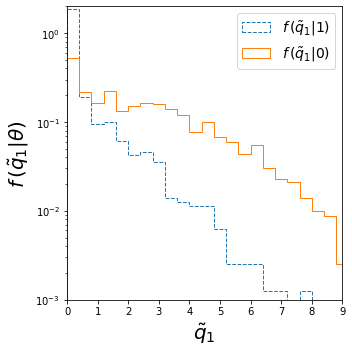

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.hist(
    signal_qtilde,
    bins=np.linspace(0, 10, 26),
    histtype="step",
    density=True,
    linestyle="dashed",
    label=r"$f\,(\tilde{q}_1|1)$",
)
ax.hist(
    bkg_qtilde,
    bins=np.linspace(0, 10, 26),
    histtype="step",
    density=True,
    label=r"$f\,(\tilde{q}_1|0)$",
)

ax.set_xlim(0, 9)
ax.set_ylim(1e-3, 2)
ax.semilogy()
ax.set_xlabel(r"$\tilde{q}_1$", fontsize=20)
ax.set_ylabel(r"$f\,(\tilde{q}_1|\theta)$", fontsize=20)
ax.legend(loc="best", fontsize=14);

fig.savefig("alternative_statistic.pdf")
fig.savefig("alternative_statistic.png")